# Overfitting

### Introduction

### Setting up our data

We have stored our feature data in the `data.py` file.  Our data adheres to the following model:

$$customer\_amount = 3*temp + 40*is\_weekend + 10 + \epsilon_i$$

In [5]:
import numpy as np
import pandas as pd

In [6]:
import pandas as pd

df = pd.read_csv('./temps_with_weekends.csv', index_col = 0)
df[:3]

,temps,is_weekend,customers
0,30,0,100
1,31,0,103
2,32,1,146


In [22]:
df_customer[:3]

,temperature,is_weekend,customers
0,30,0,125
1,31,0,133
2,32,1,170


In [24]:
X = df_customer[['temperature', 'is_weekend']]
y = df_customer['customers']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
model = LinearRegression()
model.fit(X, y)

sqrt(mean_squared_error(customers_with_errors, model.predict(temps_and_is_weekends)))

21.565735597602885

In [28]:
model.score(X, y)

0.9059072683379463

That error is caused by randomness in our training data.  Here is our related plot.

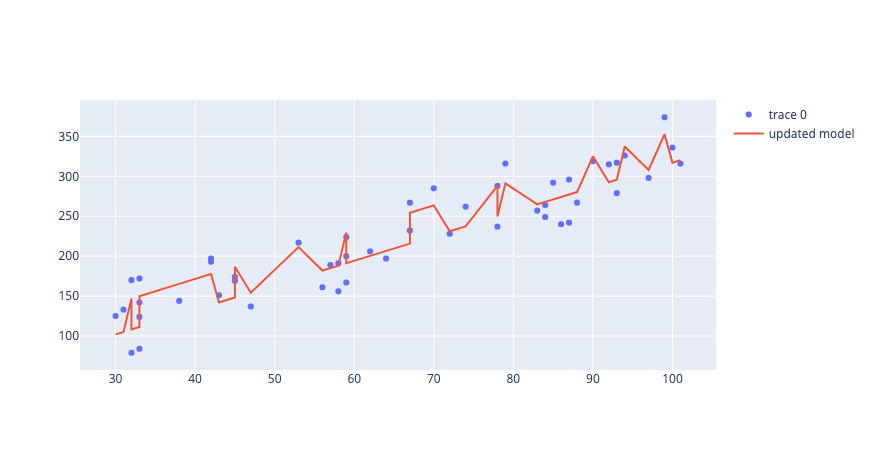

In [27]:
import plotly.graph_objects as go
import numpy as np
predictions = model.predict(X)

temp = df_customer['temperature']
trace_1 = go.Scatter(x = temp, y =  y, mode = 'markers') 
model_trace = go.Scatter(x = temp, y = predictions, mode = 'lines', name = 'updated model')
go.Figure([trace_1, model_trace])

### We want more

In [29]:
from numpy.random import randint, seed
seed(2)
random_ages = randint(25, 65, 50)
random_ages[0:3]

array([40, 33, 47])

Ok, let's add it to our list of independent variables and throw it into our model.

In [63]:
X_with_ages = np.column_stack((X,random_ages))

In [64]:
from sklearn.linear_model import LinearRegression
updated_model = LinearRegression()
updated_model.fit(X_with_ages, customers_with_errors)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(customers_with_errors, updated_model.predict(X_with_ages)))

20.981542668372782

In [69]:
updated_model.coef_

array([ 3.05231752, 39.15999752, -0.43176901])

In [77]:
df_random_ages = pd.DataFrame(np.column_stack((X_with_ages, y)), columns = ['temp', 'is_weekend', 'random_ages', 'customers'])

In [78]:
df_random_ages[:3]

,temp,is_weekend,random_ages,customers
0,30,0,40,125
1,31,0,33,133
2,32,1,47,170


In [ ]:
from sklearn.linear_model import LinearRegression
updated_model = LinearRegression()
updated_model.fit(X_with_ages, customers_with_errors)

Now as you can see, by introducing the `random_ages`, our rmse did decrease - even if just a little bit.  It went from 21.56 to 20.98.